# Searching, Sorting, and Timing

## Agenda

1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

## 1. Timing

In [1]:
import time
time.time()

1473524559.270496

In [2]:
start= time.time()
time.sleep(1)
end=time.time()
print(end-start)

1.0054640769958496


In [3]:
from time import time, sleep
time()

1473524560.311449

In [4]:
time()

1473524560.317769

In [5]:
start= time()
sum(range(10**6))
end= time()
end-start

0.027564048767089844

In [6]:
def timeit(f):
    start = time()
    f()
    end = time()
    return end -start

In [7]:
timeit(lambda: sum(range(10**6)))

0.02947998046875

In [8]:
def timeit(f):
    duration= 0
    for _ in range (100):
        start = time()
        f()
        end = time()
        duration += end-start
    return duration/100

In [9]:
timeit(lambda: sum(range(10**6)))

0.028886685371398924

In [10]:
import timeit
timeit.timeit(stmt='sum(range(10**6))', number=100)

2.7518397130043013

In [11]:
import timeit
import random
lst = [random.random() for _ in range(100)]
sorted(lst)

timeit.timeit(stmt='sorted(lst)',
             setup = 'import random; lst = [random.random() for _ in range(10000)]',
             number = 100)

0.2644098099990515

In [12]:
import random
def to_time(lst):
    #does something interesting with the list
    pass

timeit.timeit(stmt='to_time(lst)', 
             setup='lst=lst=[random.random() for _ in range(10000)]',
             globals=globals(),
             number=1000)

8.925200381781906e-05

## 2. Prelude: Timing list indexing

In [13]:
import timeit
timeit.timeit(stmt='lst[0]',
              setup='import random; lst=[0] * 10**6')

0.03738092500134371

In [14]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='import random; lst=[0] * 10**6')

0.03493509200052358

In [15]:
'lst[{}]'.format(100)

'lst[100]'

In [16]:
'{} says hi to {}'.format('John', 'Mary') 

'John says hi to Mary'

In [17]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i),
                                  globals=globals(),
                                  number=10)

In [18]:
times

[9.96440285234712e-05,
 8.760894706938416e-05,
 9.732303442433476e-05,
 0.00011366103717591614,
 9.658094495534897e-05,
 0.0001029519917210564,
 0.0001030959901981987,
 9.49850000324659e-05,
 9.005996253108606e-05,
 9.382003190694377e-05,
 9.221098298439756e-05,
 8.980002894531935e-05,
 0.00010656304948497564,
 8.737798634683713e-05,
 0.00010990501323249191,
 8.923497807700187e-05,
 9.519498416921124e-05,
 9.249503636965528e-05,
 9.540796600049362e-05,
 9.150504774879664e-05,
 9.157796012004837e-05,
 0.00010467797255842015,
 8.898703526938334e-05,
 8.976697426987812e-05,
 9.119904279941693e-05,
 9.440399298910052e-05,
 8.961397543316707e-05,
 9.19239828363061e-05,
 9.388299804413691e-05,
 9.008897905005142e-05,
 0.0001141549801104702,
 0.00010359406587667763,
 9.54770075622946e-05,
 0.00012089200026821345,
 9.971597319236025e-05,
 0.0001173350028693676,
 9.317001968156546e-05,
 0.00013277394464239478,
 9.7466996521689e-05,
 9.08579895622097e-05,
 8.828897261992097e-05,
 0.0001137919898

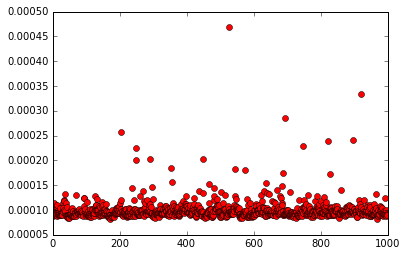

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [20]:
def index(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    return None

In [21]:
lst = list(range(100))
index(lst, 10)

10

In [22]:
index(lst, 99)

99

In [23]:
index(lst, -1)

In [24]:
def index(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return i
    raise ValueError(x)

In [25]:
index(lst, 10)

10

In [26]:
index(lst, -1)

ValueError: -1

In [27]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

Value not found: -1


In [28]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

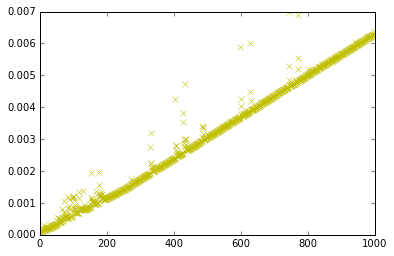

In [29]:
import matplotlib.pyplot as plt
plt.plot(times, 'yx')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

In [30]:
def index(lst, x):
    # assume that lst is sorted!!!
    lo = 0
    hi = len(lst)-1
    mid = (lo+hi)//2 #integer division
    while lo <= hi and lst[mid] != x:
        if lst[mid] < x:
            lo = mid+1
        else:
            hi = mid-1
        mid = (lo+hi)//2 #integer division
    if lst[mid] == x:
        return mid
    else:
        return None

In [31]:
lst = list(range(1000))
index(lst, 10)

10

In [32]:
index(lst, 999)

999

In [33]:
index(lst, -1)

In [34]:
for i in range(len(lst)):
    assert(i == index(lst, i))

In [37]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=1000))

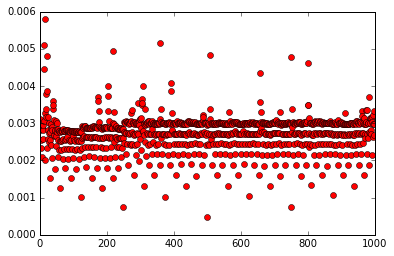

In [38]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [39]:
import timeit
import random
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)'.format(random.randrange(size)),
                               globals=globals(),
                               number=10000))

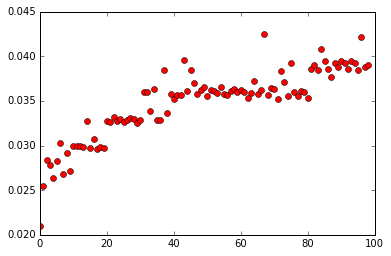

In [40]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [41]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

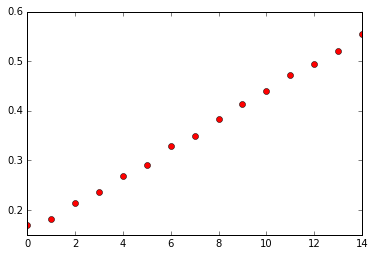

In [42]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

In [43]:
import random
lst = list(range(1000))
random.shuffle(lst)

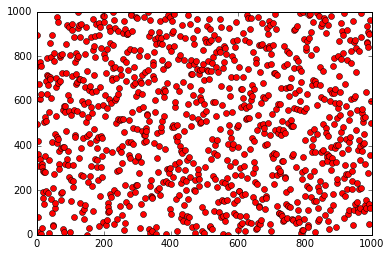

In [44]:
plt.plot(lst, 'ro')
plt.show()

In [48]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1]
            else:
                break

In [49]:
insertion_sort(lst)

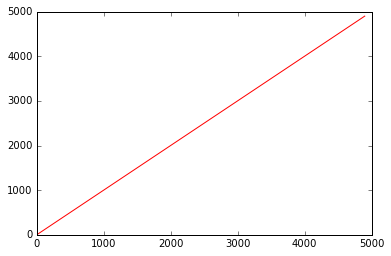

In [53]:
plt.plot(lst, 'r')
plt.show()

In [54]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

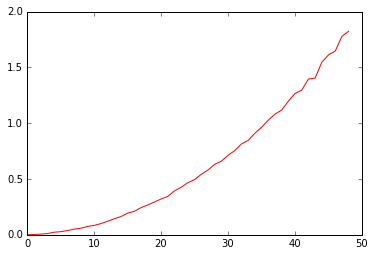

In [56]:
plt.plot(times, 'r')
plt.show()